<a href="https://colab.research.google.com/github/Jorgefrip12/cd-Jorge-Ruiz-2023/blob/main/Taller_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib numpy pandas seaborn scikit-learn ipython
!pip install kneed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.4 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

In [3]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [4]:
pd.set_option('display.max_columns', None)
df.head(10)

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,area_,ocupacion_,tip_ss_,cod_ase_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,fec_hos_,condicion_final,fecha_defuncion,fecha_nacimiento,certif_defuncion,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,1,2411,Contributivo,EPS037,2,2,2,2,1,2,2,2,17/01/2020,10/01/2020,2,NaN,1,NaN,12/11/1994,NaN,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,1,9997,Contributivo,EPS003,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,2,NaN,1,NaN,9/02/1995,NaN,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,1,9999,Contributivo,EPS013,2,2,2,2,2,2,2,2,12/01/2020,8/01/2020,2,NaN,1,NaN,19/09/1961,NaN,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,1,4121,Contributivo,EPS013,2,2,2,2,2,2,2,2,10/01/2020,6/01/2020,2,NaN,1,NaN,6/10/1990,NaN,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,1,9210,Especial,37086,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,1,10/01/2020,1,NaN,12/02/1963,NaN,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
5,6,25/01/2020,1,2020,45,1,F,170,68,276,1,5121,Contributivo,EPS016,2,2,2,2,2,2,2,2,16/01/2020,8/01/2020,2,NaN,1,NaN,6/04/1974,NaN,2,1,1,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.073368,-73.088821
6,7,16/01/2020,1,2020,46,1,F,170,68,276,1,7732,Subsidiado,68000,2,2,2,2,2,2,2,2,13/01/2020,11/01/2020,1,13/01/2020,1,NaN,29/09/1973,NaN,2,1,1,2,1,1,1,1,2,1,2,2,2,2,2,2,2,2,2. Hospitalizacion piso,7.080947,-73.089188
7,8,9/01/2020,1,2020,27,1,F,170,68,276,1,2221,Contributivo,EPS005,2,2,2,2,2,2,2,1,9/01/2020,7/01/2020,2,NaN,1,NaN,10/08/1992,NaN,1,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.084087,-73.085953
8,9,15/01/2020,1,2020,8,2,F,170,68,276,1,9999,Subsidiado,68000,2,2,2,2,2,2,2,2,12/01/2020,11/01/2020,1,12/01/2020,1,NaN,17/04/2019,NaN,2,1,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2. Hospitalizacion piso,7.083333,-73.102295
9,10,7/01/2020,1,2020,2,1,M,170,68,276,1,9997,Contributivo,EPS013,2,2,2,2,2,2,2,2,7/01/2020,7/01/2020,2,NaN,1,NaN,7/06/2017,NaN,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067431,-73.097923


In [5]:
df.dtypes


ID                     int64
fec_not               object
semana                 int64
año                    int64
edad_                  int64
uni_med_               int64
sexo_                 object
cod_pais_o             int64
cod_dpto_o             int64
cod_mun_o              int64
area_                  int64
ocupacion_             int64
tip_ss_               object
cod_ase_              object
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
fecha_contagio        object
inicio_sintomas       object
pac_hos_               int64
fec_hos_              object
condicion_final        int64
fecha_defuncion      float64
fecha_nacimiento      object
certif_defuncion     float64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias      

In [6]:
# Reemplazar 'F' con 1 y 'M' con 2 en la columna 'sexo_'
df['sexo_'] = df['sexo_'].replace({'F': 1, 'M': 2})


In [7]:
pd.set_option('display.max_columns', None)
df.head(10)

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,area_,ocupacion_,tip_ss_,cod_ase_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,fec_hos_,condicion_final,fecha_defuncion,fecha_nacimiento,certif_defuncion,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,1,170,68,276,1,2411,Contributivo,EPS037,2,2,2,2,1,2,2,2,17/01/2020,10/01/2020,2,NaN,1,NaN,12/11/1994,NaN,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,2,170,68,276,1,9997,Contributivo,EPS003,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,2,NaN,1,NaN,9/02/1995,NaN,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,2,170,68,276,1,9999,Contributivo,EPS013,2,2,2,2,2,2,2,2,12/01/2020,8/01/2020,2,NaN,1,NaN,19/09/1961,NaN,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,1,170,68,276,1,4121,Contributivo,EPS013,2,2,2,2,2,2,2,2,10/01/2020,6/01/2020,2,NaN,1,NaN,6/10/1990,NaN,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,1,170,68,276,1,9210,Especial,37086,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,1,10/01/2020,1,NaN,12/02/1963,NaN,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
5,6,25/01/2020,1,2020,45,1,1,170,68,276,1,5121,Contributivo,EPS016,2,2,2,2,2,2,2,2,16/01/2020,8/01/2020,2,NaN,1,NaN,6/04/1974,NaN,2,1,1,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.073368,-73.088821
6,7,16/01/2020,1,2020,46,1,1,170,68,276,1,7732,Subsidiado,68000,2,2,2,2,2,2,2,2,13/01/2020,11/01/2020,1,13/01/2020,1,NaN,29/09/1973,NaN,2,1,1,2,1,1,1,1,2,1,2,2,2,2,2,2,2,2,2. Hospitalizacion piso,7.080947,-73.089188
7,8,9/01/2020,1,2020,27,1,1,170,68,276,1,2221,Contributivo,EPS005,2,2,2,2,2,2,2,1,9/01/2020,7/01/2020,2,NaN,1,NaN,10/08/1992,NaN,1,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.084087,-73.085953
8,9,15/01/2020,1,2020,8,2,1,170,68,276,1,9999,Subsidiado,68000,2,2,2,2,2,2,2,2,12/01/2020,11/01/2020,1,12/01/2020,1,NaN,17/04/2019,NaN,2,1,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2. Hospitalizacion piso,7.083333,-73.102295
9,10,7/01/2020,1,2020,2,1,2,170,68,276,1,9997,Contributivo,EPS013,2,2,2,2,2,2,2,2,7/01/2020,7/01/2020,2,NaN,1,NaN,7/06/2017,NaN,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067431,-73.097923


In [8]:
# Contar el número de nulos en cada columna del DataFrame
num_nulos_por_columna = df.isnull().sum()

# Para contar el número total de nulos en todo el DataFrame, puedes sumar los valores devueltos por sum()
num_total_nulos = df.isnull().sum().sum()

# Para ver el número de nulos en cada columna
print(num_nulos_por_columna)

# Para ver el número total de nulos en todo el DataFrame
print("Número total de valores nulos en el DataFrame:", num_total_nulos)


ID                      0
fec_not                 0
semana                  0
año                     0
edad_                   0
uni_med_                0
sexo_                   0
cod_pais_o              0
cod_dpto_o              0
cod_mun_o               0
area_                   0
ocupacion_              0
tip_ss_                 0
cod_ase_                9
gp_discapa              0
gp_desplaz              0
gp_migrant              0
gp_carcela              0
gp_gestan               0
gp_calle                0
gp_psiquia              0
gp_vic_vio              0
fecha_contagio          2
inicio_sintomas         2
pac_hos_                0
fec_hos_             1014
condicion_final         0
fecha_defuncion      1262
fecha_nacimiento        0
certif_defuncion     1262
familiar_sintomas       0
fiebre                  0
cefalea                 0
dolor_retroocular       0
mialgias                0
artralgia               0
erupcion                0
dolor_abdomen           0
vomito      

In [9]:
# Eliminar las columnas 'fec_hos_', 'fecha_defuncion' y 'certif_defuncion'
df = df.drop(['fec_hos_', 'fecha_defuncion', 'certif_defuncion'], axis=1)

# Ahora, df no contiene las columnas 'fec_hos_', 'fecha_defuncion' y 'certif_defuncion'


In [10]:
df.dtypes


ID                     int64
fec_not               object
semana                 int64
año                    int64
edad_                  int64
uni_med_               int64
sexo_                  int64
cod_pais_o             int64
cod_dpto_o             int64
cod_mun_o              int64
area_                  int64
ocupacion_             int64
tip_ss_               object
cod_ase_              object
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
fecha_contagio        object
inicio_sintomas       object
pac_hos_               int64
condicion_final        int64
fecha_nacimiento      object
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias               int64
artralgia              int64
erupcion               int64
dolor_abdomen 

In [11]:
# Reemplazar los valores en la columna 'tip_ss_' con números según la correspondencia dada
df['tip_ss_'] = df['tip_ss_'].replace({'Contributivo': 1, 'Subsidiado': 2, 'Especial': 3})


In [18]:
pd.set_option('display.max_columns', None)
df.head(10)

,ID,semana,año,edad_,uni_med_,sexo_,area_,ocupacion_,tip_ss_,cod_ase_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,condicion_final,fecha_nacimiento,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,1,2020,25,1,1,1,2411,1,EPS037,2,2,2,2,1,2,2,2,17/01/2020,10/01/2020,2,1,12/11/1994,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,1,2020,24,1,2,1,9997,1,EPS003,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,2,1,9/02/1995,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,1,2020,58,1,2,1,9999,1,EPS013,2,2,2,2,2,2,2,2,12/01/2020,8/01/2020,2,1,19/09/1961,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,1,2020,29,1,1,1,4121,1,EPS013,2,2,2,2,2,2,2,2,10/01/2020,6/01/2020,2,1,6/10/1990,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,1,2020,56,1,1,1,9210,3,37086,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,1,1,12/02/1963,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
5,6,1,2020,45,1,1,1,5121,1,EPS016,2,2,2,2,2,2,2,2,16/01/2020,8/01/2020,2,1,6/04/1974,2,1,1,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.073368,-73.088821
6,7,1,2020,46,1,1,1,7732,2,68000,2,2,2,2,2,2,2,2,13/01/2020,11/01/2020,1,1,29/09/1973,2,1,1,2,1,1,1,1,2,1,2,2,2,2,2,2,2,2,2. Hospitalizacion piso,7.080947,-73.089188
7,8,1,2020,27,1,1,1,2221,1,EPS005,2,2,2,2,2,2,2,1,9/01/2020,7/01/2020,2,1,10/08/1992,1,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.084087,-73.085953
8,9,1,2020,8,2,1,1,9999,2,68000,2,2,2,2,2,2,2,2,12/01/2020,11/01/2020,1,1,17/04/2019,2,1,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2. Hospitalizacion piso,7.083333,-73.102295
9,10,1,2020,2,1,2,1,9997,1,EPS013,2,2,2,2,2,2,2,2,7/01/2020,7/01/2020,2,1,7/06/2017,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067431,-73.097923


In [19]:
# Eliminar las columnas especificadas
columnas_a_eliminar = [ 'area_', 'ocupacion_', 'cod_ase_', 'fecha_contagio', 'inicio_sintomas', 'fecha_nacimiento']
df = df.drop(columnas_a_eliminar, axis=1)

# Ahora, df no contiene las columnas especificadas


In [20]:
# Obtener los valores únicos en la columna 'conducta'
valores_unicos_conducta = df['conducta'].unique()

# Imprimir los valores únicos
print(valores_unicos_conducta)


['1. Ambulatorio' '2. Hospitalizacion piso' '4. Observacion' '3. UCI']


In [21]:
# Obtener columnas binarias para cada valor único en 'conducta'
df_conducta_dummies = pd.get_dummies(df['conducta'])

# Concatenar las nuevas columnas binarias al DataFrame original
df = pd.concat([df, df_conducta_dummies], axis=1)

# Eliminar la columna 'conducta' original si ya has creado las columnas binarias
df = df.drop(['conducta'], axis=1)


In [22]:
pd.set_option('display.max_columns', None)
df.head(10)

,ID,semana,año,edad_,uni_med_,sexo_,tip_ss_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,condicion_final,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,latitud,longitud,1. Ambulatorio,2. Hospitalizacion piso,3. UCI,4. Observacion
0,1,1,2020,25,1,1,1,2,2,2,2,1,2,2,2,2,1,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,7.076011,-73.102501,1,0,0,0
1,2,1,2020,24,1,2,1,2,2,2,2,2,2,2,2,2,1,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,7.079495,-73.105400,1,0,0,0
2,3,1,2020,58,1,2,1,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,7.090290,-73.091003,1,0,0,0
3,4,1,2020,29,1,1,1,2,2,2,2,2,2,2,2,2,1,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,7.067435,-73.090958,1,0,0,0
4,5,1,2020,56,1,1,3,2,2,2,2,2,2,2,2,1,1,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,7.066905,-73.104980,0,1,0,0
5,6,1,2020,45,1,1,1,2,2,2,2,2,2,2,2,2,1,2,1,1,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,7.073368,-73.088821,1,0,0,0
6,7,1,2020,46,1,1,2,2,2,2,2,2,2,2,2,1,1,2,1,1,2,1,1,1,1,2,1,2,2,2,2,2,2,2,2,7.080947,-73.089188,0,1,0,0
7,8,1,2020,27,1,1,1,2,2,2,2,2,2,2,1,2,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,7.084087,-73.085953,1,0,0,0
8,9,1,2020,8,2,1,2,2,2,2,2,2,2,2,2,1,1,2,1,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,7.083333,-73.102295,0,1,0,0
9,10,1,2020,2,1,2,1,2,2,2,2,2,2,2,2,2,1,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,7.067431,-73.097923,1,0,0,0


In [23]:
df.dtypes

ID                           int64
semana                       int64
año                          int64
edad_                        int64
uni_med_                     int64
sexo_                        int64
tip_ss_                     object
gp_discapa                   int64
gp_desplaz                   int64
gp_migrant                   int64
gp_carcela                   int64
gp_gestan                    int64
gp_calle                     int64
gp_psiquia                   int64
gp_vic_vio                   int64
pac_hos_                     int64
condicion_final              int64
familiar_sintomas            int64
fiebre                       int64
cefalea                      int64
dolor_retroocular            int64
mialgias                     int64
artralgia                    int64
erupcion                     int64
dolor_abdomen                int64
vomito                       int64
diarrea                      int64
somnolencia                  int64
hipotension         

In [24]:
# Crear columnas binarias para cada valor único en 'tip_ss_' y asignar 1 si pertenece y 0 si no
df_tip_ss_dummies = pd.get_dummies(df['tip_ss_'], prefix='tip_ss_')

# Concatenar las nuevas columnas binarias al DataFrame original
df = pd.concat([df, df_tip_ss_dummies], axis=1)

# Eliminar la columna 'tip_ss_' original si ya has creado las columnas binarias
df = df.drop(['tip_ss_'], axis=1)


In [25]:
df

,ID,semana,año,edad_,uni_med_,sexo_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,condicion_final,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,latitud,longitud,1. Ambulatorio,2. Hospitalizacion piso,3. UCI,4. Observacion,tip_ss__1,tip_ss__2,tip_ss__3,tip_ss__No asegurado,tip_ss__Particular
0,1,1,2020,25,1,1,2,2,2,2,1,2,2,2,2,1,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,7.076011,-73.102501,1,0,0,0,1,0,0,0,0
1,2,1,2020,24,1,2,2,2,2,2,2,2,2,2,2,1,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,7.079495,-73.105400,1,0,0,0,1,0,0,0,0
2,3,1,2020,58,1,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,7.090290,-73.091003,1,0,0,0,1,0,0,0,0
3,4,1,2020,29,1,1,2,2,2,2,2,2,2,2,2,1,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,7.067435,-73.090958,1,0,0,0,1,0,0,0,0
4,5,1,2020,56,1,1,2,2,2,2,2,2,2,2,1,1,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,7.066905,-73.104980,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,9,2020,36,1,1,2,2,2,2,2,2,2,2,2,1,2,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,7.072610,-73.099487,1,0,0,0,1,0,0,0,0
1258,1259,9,2020,42,1,2,2,2,2,2,2,2,2,2,1,1,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,7.065252,-73.103607,0,1,0,0,1,0,0,0,0
1259,1260,9,2020,2,1,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,7.091391,-73.103264,1,0,0,0,1,0,0,0,0
1260,1261,9,2020,12,1,1,2,2,2,2,2,2,2,2,2,1,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,7.061083,-73.097000,1,0,0,0,1,0,0,0,0


In [26]:
# Cambiar el nombre de las columnas binarias
df.rename(columns={'tip_ss_1': 'Contributivo', 'tip_ss_2': 'Subsidiado', 'tip_ss_3': 'Especial'}, inplace=True)


In [29]:
#Generación de datos aleatorios alrededor de 3 centroides
features, true_labels = make_blobs(
  n_samples=200,
  centers=3,
  cluster_std=2.75,
  random_state=42
)

In [30]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [31]:
true_labels

array([1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1,
       2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 1,
       2, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0,
       1, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 1, 2,
       1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2,
       0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2,
       1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1,
       0, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0,
       1, 1])

In [32]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [33]:
kmeans = KMeans(
  init="random",
  n_clusters=3,
  n_init=10,
  max_iter=300,
  random_state=42
)

In [34]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [35]:
# Cuadrado de errores estándar más bajo (SSE)
kmeans.inertia_

74.57960106819854

In [36]:
# Posición final de los centroides
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [37]:
# Número de iteraciones requeridas
kmeans.n_iter_

2

In [38]:
kmeans.labels_

array([2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0,
       2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1,
       2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1,
       0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1,
       2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2,
       0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0,
       2, 2], dtype=int32)

In [39]:
true_labels

array([1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1,
       2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 1,
       2, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0,
       1, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 1, 2,
       1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2,
       0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2,
       1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1,
       0, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0,
       1, 1])

In [40]:
kmeans_kwargs = {
  "init": "random",
  "n_init": 10,
  "max_iter": 300,
  "random_state": 42,
}

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

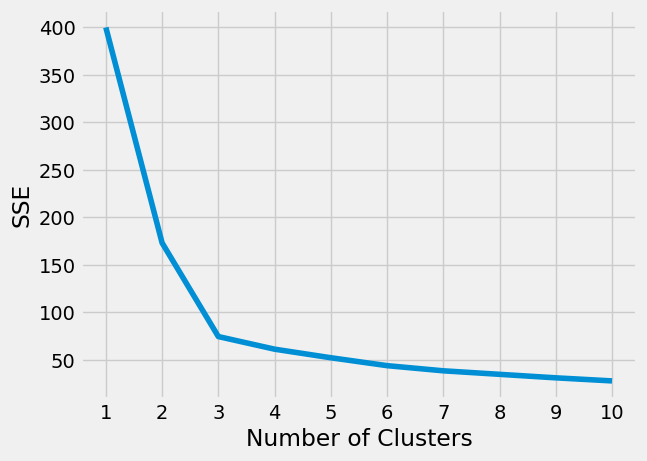

In [41]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [42]:
kl = KneeLocator(
  range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

3

In [43]:
silhouette_coefficients = []

#Aquí se inicia con 2 cluester
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

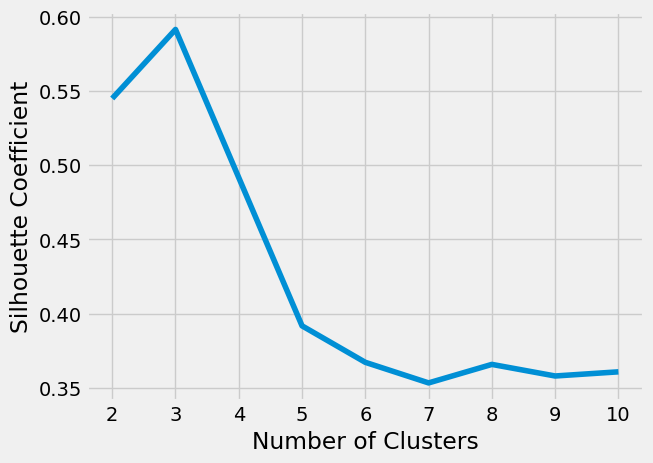

In [44]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()